# Confidence Interval

In [1]:
import scipy.stats as st
import statistics as s
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x=np.random.normal(size=100)

#sample mean
sample_mean=np.mean(x)
#standard deviation of sample
sample_std=np.std(x)
## Standard error of mean
std_err=st.sem(x)
Z_value=st.norm.ppf(1.0-0.01)

### Calculating the lower and upper bounds for confidence interval
lowerCI=sample_mean-(Z_value*std_err)
upperCI=sample_mean+(Z_value*std_err)

print(lowerCI)
print(upperCI)

-0.11477951297896367
0.31483825638018076


<Figure size 720x360 with 0 Axes>

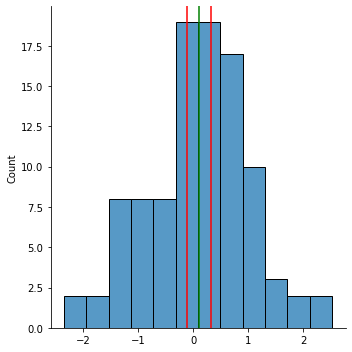

In [3]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.displot(x)
plt.axvline(x=lowerCI,color="red")
plt.axvline(x=upperCI,color="red")
plt.axvline(x=sample_mean,color="green")
plt.show()

# One sample t test

In [4]:
from scipy.stats import ttest_1samp
from random import sample, choices

In [5]:
# generate a random sample
sample1=sample(range(145,180),30)

## cslculating sample mean
sample_mean=np.mean(sample1)

## calculating the one sample t test
print(ttest_1samp(a=sample1,popmean=165))


Ttest_1sampResult(statistic=-1.4417066035286843, pvalue=0.16009784665643043)


In [6]:
sample_mean

162.16666666666666

# Two sample t test/Independent t test

In [7]:
from scipy.stats import ttest_ind

In [8]:
## creating the sample data
sample1=sample(range(140,184),30)
sample2=sample(range(140,184),30)

Null: Sample1 mean = sample2 mean

Alternate: Sample1 mean not = sample2 mean


In [9]:
print(np.var(sample1))
print(np.var(sample2))


159.19555555555556
163.36555555555555


In [10]:
#Calcukating two sample t test
ttest_ind(sample1,sample2,equal_var=False)

Ttest_indResult(statistic=0.6696479500840181, pvalue=0.5057399243352545)

# at 95 % confidence level, we fail to reject the null hypothesis

We dont have enough evidence to say whether average hight of male is different than female

In [11]:
np.mean(sample1)

164.26666666666668

In [12]:
np.mean(sample2)

162.03333333333333

# Paired T test

In [13]:
from scipy.stats import ttest_rel

In [14]:
fasting_sugar=sample(range(75,110),30)
ppbs=sample(range(95,150),30)

ttest_rel(fasting_sugar,ppbs)

Ttest_relResult(statistic=-8.528519421884036, pvalue=2.142119040691923e-09)

# F test

In [15]:
male_height=sample(range(145,190),30)
female_height=sample(range(140,170),30)

f=np.var(male_height)/np.var(female_height)

p=1-st.f.cdf(f,(len(male_height)-1),(len(female_height)-1))

print(f, p)

2.207504634779384 0.018425547345841564


In [16]:
# since p value is less than 0.05, at 95% confidence i will reject the null hypothesis. Both samples do not equal 
#variances

# Analysis of Variance

One Way ANOVA

In [17]:
from scipy.stats import f_oneway

In [18]:
sample1=sample(range(130,150),20)
sample2=sample(range(133,155),20)
sample3=sample(range(120,140),20)

f_oneway(sample1,sample2,sample3)

F_onewayResult(statistic=27.91629446205827, pvalue=3.5322271490296806e-09)

In [19]:
## Since p values is less than 0.05, at 95% confidence, i will reject the null hypothesis. Meaning,
#the avergae height for atleast one sample is different than other 2 samples

# Analysis of Variance
Two Way ANOVA

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
x={"Lectures":np.repeat(["Daily","Weekly"],20),
  "Tuition":np.repeat(["Daily","Weekly"],20),
   "Gender":np.repeat(["M","F"],20),
  "Marks":sample(range(33,100),40)}

data=pd.DataFrame(x)

model=ols('Marks~C(Lectures)+C(Tuition)+C(Gender)',data=data).fit()

sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(Lectures),8537.760,1.0,21.222718,4.497104e-05
C(Tuition),8537.760,1.0,21.222718,4.497104e-05
C(Gender),53562.645,1.0,133.143229,5.529898e-14
Residual,15287.150,38.0,NaN,NaN


In [22]:
## Since p value for both parameters is greater than 0.05, we fail to reject the null hypotheses. 
#meaning, both the parameters do not hav any effect on Marks 

# One Sample Z test

In [23]:
from random import sample
from statsmodels.stats.weightstats import ztest

In [24]:
sampledata=sample(range(30,80),50)

ztest(sampledata,value=55)

(-0.24253562503633297, 0.8083651559145103)

# Two sample z test


In [25]:
from statsmodels.stats.weightstats import ztest

In [26]:
sample1=sample(range(130,185),50)
sample2=sample(range(130,185),50)

ztest(sample1,sample2)

(-0.3865228509299656, 0.6991094824604124)

# Chi Square test of independence

In [27]:
from scipy.stats import chi2_contingency

In [28]:
location=np.repeat(["Rural","Urban"],20)
loan=np.repeat(["Approved","Not Approved"],20)

data=pd.DataFrame(location,loan).reset_index()
data.columns=["Location","Loan"]

contingency_table=pd.crosstab(data["Location"],data["Loan"])

contingency_table

Loan,Rural,Urban
Location,,
Approved,20,0
Not Approved,0,20


In [29]:
chi2_contingency(contingency_table)

(36.1,
 1.8744684504065423e-09,
 1,
 array([[10., 10.],
        [10., 10.]]))